In [1]:
# Import packages
import numpy as np
import tomopy
import cv2
import matplotlib.pyplot as plt
from skimage.transform import rotate, AffineTransform
import tifffile
from skimage import transform as tf

In [2]:
# Creating ground truth tomography
data = tomopy.shepp3d(256)
ang = tomopy.angles(181)
proj = tomopy.project(data, ang)

In [3]:
# Randomly determined misalignment axis
mis_axis = np.random.normal(0, 1, (200, 3))
mis_axis[:, :1] = mis_axis[:, :1]*4
mis_axis = np.round(mis_axis).astype(int)

In [11]:
# Define function for artificial misalignment
def misalign(prj, mis_axis, ang_tilt = False, noise = False, background = False, cv = False):
    num_prj, col, row = prj.shape
    prj_tmp = np.zeros_like(prj)
    
    for i in range(num_prj):
        d_row, d_col, d_ang = mis_axis[i]
        
        if ang_tilt == True:
            prj_tmp[i, :, :] = rotate(prj[i,:,:], d_ang)
        else:
            prj_tmp[i, :, :] = prj[i,:,:]
               
        if(cv):
            translation_matrix = np.float32([ [1,0,d_row], [0,1,d_col] ])
            prj_tmp[i, :, :] = cv2.warpAffine(prj_tmp[i, :, :], translation_matrix, (row, col))
        else:
            tform = tf.AffineTransform(translation=(mis_axis[i][1], mis_axis[i][0]))
            prj_tmp[i] = tf.warp(prj[i], tform)
        
        if noise == True:
            prj_tmp[i, :, :] = random_noise(prj_tmp[i, :, :], mode = 'gaussian')
            
        if background == True:
            prj_tmp[i, :, :] = prj_tmp[i, :, :]+np.random.random()/5
            prj_tmp[i, :, :] = prj_tmp[i, :, :]/prj_tmp[i, :, :].max()
            
    return prj_tmp

In [12]:
# Creating misaligned projections
proj_mis1 = misalign(proj, mis_axis, ang_tilt = True, cv = True)
proj_mis2 = misalign(proj, mis_axis, ang_tilt = True)

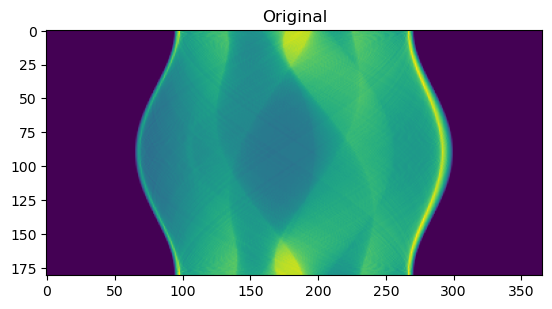

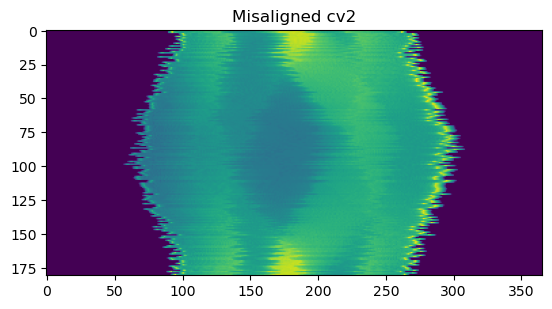

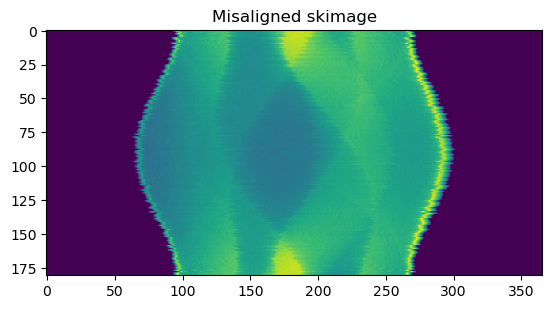

In [13]:
# Sinogram for original
plt.imshow(proj[:, 128, :])
plt.title('Original')
plt.show()

# Sinogram for misaligned
plt.imshow(proj_mis1[:, 128, :])
plt.title('Misaligned cv2')
plt.show()

# Sinogram for misaligned
plt.imshow(proj_mis2[:, 128, :])
plt.title('Misaligned skimage')
plt.show()